In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [11]:
print(df['status_label'].value_counts())

status_label
alive     73462
failed     5220
Name: count, dtype: int64


In [19]:
df = df[df['X1'] <= df['X10']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78681 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78681 non-null  object 
 1   status_label  78681 non-null  object 
 2   year          78681 non-null  int64  
 3   X1            78681 non-null  float64
 4   X2            78681 non-null  float64
 5   X3            78681 non-null  float64
 6   X4            78681 non-null  float64
 7   X5            78681 non-null  float64
 8   X6            78681 non-null  float64
 9   X7            78681 non-null  float64
 10  X8            78681 non-null  float64
 11  X9            78681 non-null  float64
 12  X10           78681 non-null  float64
 13  X11           78681 non-null  float64
 14  X12           78681 non-null  float64
 15  X13           78681 non-null  float64
 16  X14           78681 non-null  float64
 17  X15           78681 non-null  float64
 18  X16           78681 non-null  f

# Balancing dataset

In [13]:
from sklearn.utils import resample

df_majority = df[df.status_label == "alive"]
df_minority = df[df.status_label == "failed"]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.head()
df_balanced.info()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
27968,C_2509,alive,2000,3.027,0.303,0.232,-2.638,0.654,-2.772,0.087,...,1.190,3.989,0.000,-2.870,0.887,0.360,-33.301,1.190,0.360,3.828
14232,C_1178,alive,2016,1546.200,4414.200,509.500,813.200,630.400,-3.900,700.500,...,5550.600,8762.600,3537.100,303.700,1136.400,922.600,-136.200,5550.600,6489.600,4737.400
12784,C_1061,alive,2015,240.664,59.744,22.900,28.028,26.388,-6.079,18.398,...,196.129,406.505,147.329,5.128,136.385,30.830,9.522,196.129,187.829,168.101
43181,C_4501,alive,2016,12.079,47.827,2.548,4.634,0.248,4.196,2.869,...,52.461,49.625,0.000,2.086,4.634,8.717,17.727,52.461,13.074,47.827
64530,C_6952,alive,2002,71.568,14.918,3.697,-25.435,6.511,-27.623,1.510,...,13.469,110.773,0.000,-29.132,-1.449,4.113,-107.730,13.469,4.113,38.904


<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 27968 to 78624
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  10440 non-null  object 
 1   status_label  10440 non-null  object 
 2   year          10440 non-null  int64  
 3   X1            10440 non-null  float64
 4   X2            10440 non-null  float64
 5   X3            10440 non-null  float64
 6   X4            10440 non-null  float64
 7   X5            10440 non-null  float64
 8   X6            10440 non-null  float64
 9   X7            10440 non-null  float64
 10  X8            10440 non-null  float64
 11  X9            10440 non-null  float64
 12  X10           10440 non-null  float64
 13  X11           10440 non-null  float64
 14  X12           10440 non-null  float64
 15  X13           10440 non-null  float64
 16  X14           10440 non-null  float64
 17  X15           10440 non-null  float64
 18  X16           10440 non-nul

In [15]:
X = df_balanced.drop(columns=["status_label", "company_name", "year"])  # Features (all columns except status_label)
y = df_balanced["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8352, 18)
X_test shape: (2088, 18)
y_train shape: (8352,)
y_test shape: (2088,)


## Random Forest

RandomForestClassifier(random_state=99)

Accuracy on train set: 1.0
Accuracy on test set: 0.7447318007662835

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.77      0.71      0.74      1052
      failed       0.73      0.78      0.75      1036

    accuracy                           0.74      2088
   macro avg       0.75      0.74      0.74      2088
weighted avg       0.75      0.74      0.74      2088



<Axes: >

<Axes: >

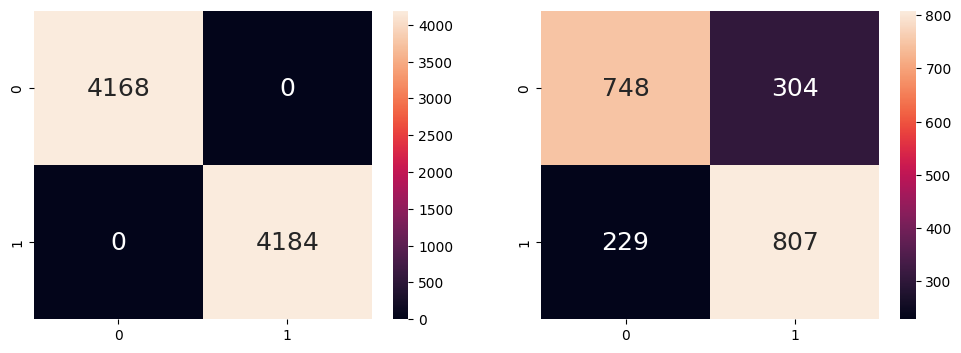

In [6]:
rf = RandomForestClassifier(random_state=99)
rf.fit(X_train, y_train)

# Predict labels for train set
y_train_pred = rf.predict(X_train)

# Predict labels for test set
y_test_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.5371 - loss: 341.8101
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.5661 - loss: 150.4037
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.5711 - loss: 105.7072
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.5647 - loss: 66.1663
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.5624 - loss: 37.4356
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.5654 - loss: 19.9863
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5560 - loss: 12.8833  
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.5567 - loss: 7.4922
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.5368 - loss: 7.7090
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.5450 - loss: 3.7897



Train set evaluation:
Train Loss: 2.694979429244995
Train Accuracy: 0.5501676201820374

Test set evaluation:
Test Loss: 4.595428943634033
Test Accuracy: 0.5478927493095398
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


<Axes: >

<Axes: >

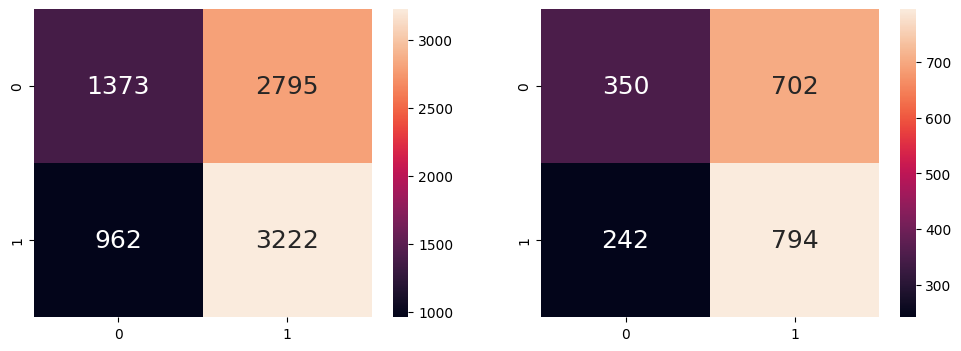

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# No balancing

In [8]:
X = df.drop(columns=["status_label", "company_name", "year"])  # Features (all columns except status_label)
y = df["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62945, 18)
X_test shape: (15737, 18)
y_train shape: (62945,)
y_test shape: (15737,)


## Random Forest

RandomForestClassifier(random_state=99)

Accuracy on train set: 0.9999523393438716
Accuracy on test set: 0.9369638431721421

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     14678
      failed       0.94      0.07      0.13      1059

    accuracy                           0.94     15737
   macro avg       0.94      0.53      0.55     15737
weighted avg       0.94      0.94      0.91     15737



<Axes: >

<Axes: >

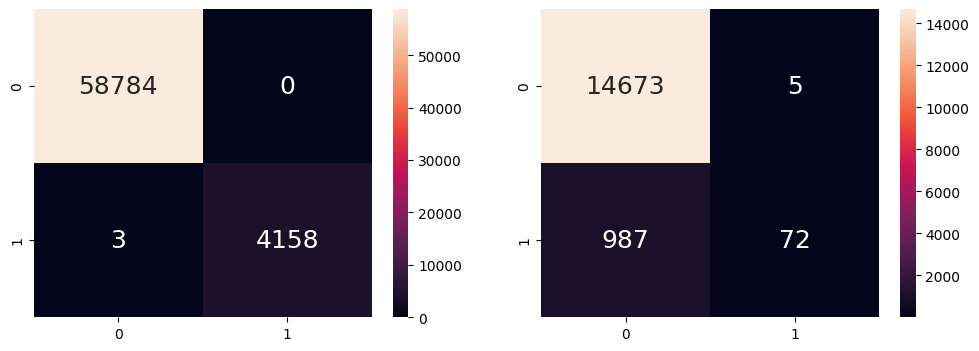

In [9]:
rf = RandomForestClassifier(random_state=99)
rf.fit(X_train, y_train)

# Predict labels for train set
y_train_pred = rf.predict(X_train)

# Predict labels for test set
y_test_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras

Epoch 1/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8719 - loss: 60.0743
Epoch 2/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9140 - loss: 5.5997
Epoch 3/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9239 - loss: 1.1090
Epoch 4/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9295 - loss: 0.6323
Epoch 5/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9330 - loss: 0.4169
Epoch 6/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9327 - loss: 0.3054
Epoch 7/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.9342 - loss: 0.2945
Epoch 8/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9345 - loss: 0.2533
Epoch 9/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.9337 - loss: 0.2478
Epoch 10/10
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9344 - loss: 0.2431



Train set evaluation:
Train Loss: 0.24399179220199585
Train Accuracy: 0.9339105486869812

Test set evaluation:
Test Loss: 0.24840110540390015
Test Accuracy: 0.932706356048584
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


<Axes: >

<Axes: >

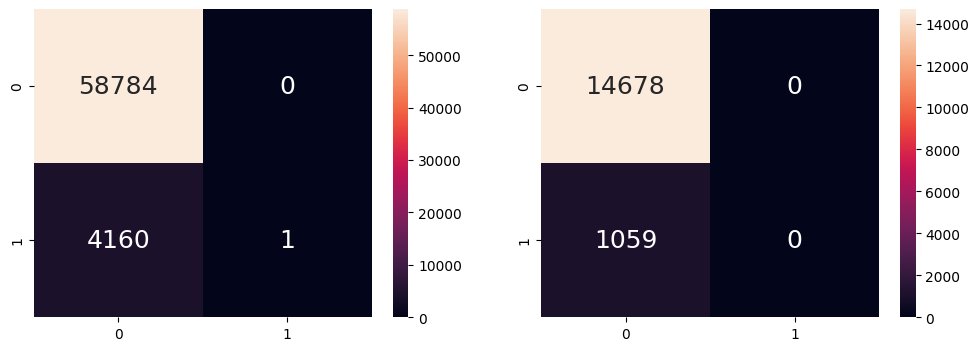

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Using recommended training, validation and test sets

In [11]:
df_train = df[df["year"] <= 2011]
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year"])
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55927 entries, 0 to 78653
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      55927 non-null  float64
 1   X2      55927 non-null  float64
 2   X3      55927 non-null  float64
 3   X4      55927 non-null  float64
 4   X5      55927 non-null  float64
 5   X6      55927 non-null  float64
 6   X7      55927 non-null  float64
 7   X8      55927 non-null  float64
 8   X9      55927 non-null  float64
 9   X10     55927 non-null  float64
 10  X11     55927 non-null  float64
 11  X12     55927 non-null  float64
 12  X13     55927 non-null  float64
 13  X14     55927 non-null  float64
 14  X15     55927 non-null  float64
 15  X16     55927 non-null  float64
 16  X17     55927 non-null  float64
 17  X18     55927 non-null  float64
dtypes: float64(18)
memory usage: 8.1 MB
<class 'pandas.core.series.Series'>
Index: 55927 entries, 0 to 78653
Series name: status_label
Non-Null Count  Dtyp

In [12]:
df_val = df[(df["year"] <= 2014) & (df["year"] >= 2012)]
y_val = df_val["status_label"]
X_val = df_val.drop(columns = ["company_name", "status_label", "year"])
X_val.info()
y_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10473 entries, 13 to 78677
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10473 non-null  float64
 1   X2      10473 non-null  float64
 2   X3      10473 non-null  float64
 3   X4      10473 non-null  float64
 4   X5      10473 non-null  float64
 5   X6      10473 non-null  float64
 6   X7      10473 non-null  float64
 7   X8      10473 non-null  float64
 8   X9      10473 non-null  float64
 9   X10     10473 non-null  float64
 10  X11     10473 non-null  float64
 11  X12     10473 non-null  float64
 12  X13     10473 non-null  float64
 13  X14     10473 non-null  float64
 14  X15     10473 non-null  float64
 15  X16     10473 non-null  float64
 16  X17     10473 non-null  float64
 17  X18     10473 non-null  float64
dtypes: float64(18)
memory usage: 1.5 MB
<class 'pandas.core.series.Series'>
Index: 10473 entries, 13 to 78677
Series name: status_label
Non-Null Count  Dt

In [13]:
df_test = df[(df["year"] >= 2015)]
y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label", "year"])
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12282 entries, 16 to 78681
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      12282 non-null  float64
 1   X2      12282 non-null  float64
 2   X3      12282 non-null  float64
 3   X4      12282 non-null  float64
 4   X5      12282 non-null  float64
 5   X6      12282 non-null  float64
 6   X7      12282 non-null  float64
 7   X8      12282 non-null  float64
 8   X9      12282 non-null  float64
 9   X10     12282 non-null  float64
 10  X11     12282 non-null  float64
 11  X12     12282 non-null  float64
 12  X13     12282 non-null  float64
 13  X14     12282 non-null  float64
 14  X15     12282 non-null  float64
 15  X16     12282 non-null  float64
 16  X17     12282 non-null  float64
 17  X18     12282 non-null  float64
dtypes: float64(18)
memory usage: 1.8 MB
<class 'pandas.core.series.Series'>
Index: 12282 entries, 16 to 78681
Series name: status_label
Non-Null Count  Dt

## Random Forest

RandomForestClassifier(random_state=99)

Validation Accuracy: 0.9544


<Axes: >

<Axes: >

Test Accuracy: 0.9761


<Axes: >

<Axes: >

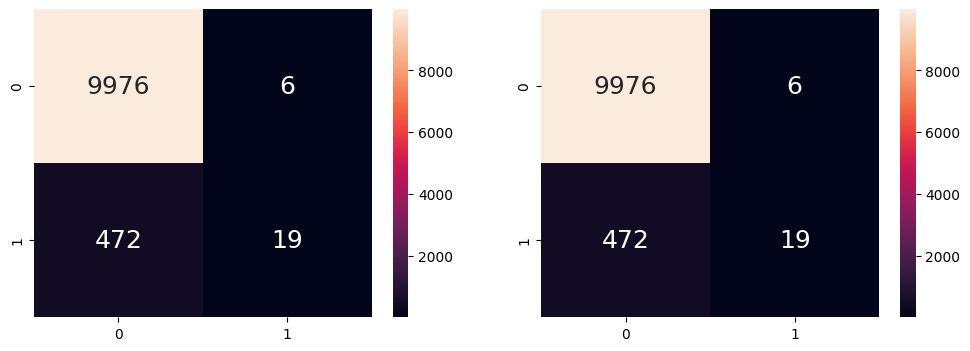

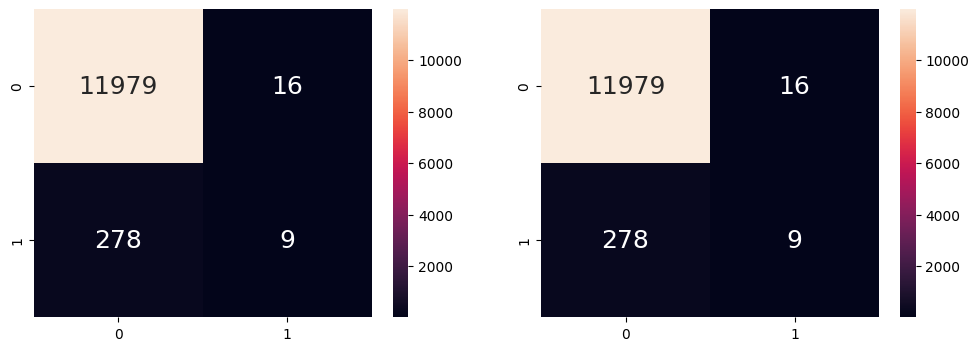

In [14]:

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=99)

# Train the model on the training set
rf.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot the Confusion Matrix for Train and val
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_val, y_val_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Hyperparameter tuning (example: adjusting n_estimators, max_depth, etc.)
# You can perform this step iteratively, adjusting hyperparameters based on validation performance

# Final evaluation on the test set
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras (without feature engineering)

Epoch 1/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8353 - loss: 98.5891 - val_accuracy: 0.9515 - val_loss: 5.3029
Epoch 2/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 6.1586 - val_accuracy: 0.9493 - val_loss: 0.5956
Epoch 3/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9007 - loss: 1.2211 - val_accuracy: 0.9525 - val_loss: 0.3518
Epoch 4/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9181 - loss: 0.6291 - val_accuracy: 0.9529 - val_loss: 0.2401
Epoch 5/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9183 - loss: 0.3990 - val_accuracy: 0.9526 - val_loss: 0.2411
Epoch 6/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9216 - loss: 0.3082 - val_accuracy: 0.9531 - val_loss: 0.2166
Epoch 7/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9185 - loss: 0.3198 - val_accuracy: 0.9531 - val_loss: 0.2098
Epoch 8/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9214 - loss: 0.2888


Train set evaluation:
Train Loss: 0.27815163135528564
Train Accuracy: 0.9205750226974487

Test set evaluation:
Test Loss: 0.15994706749916077
Test Accuracy: 0.9764696359634399
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


<Axes: >

<Axes: >

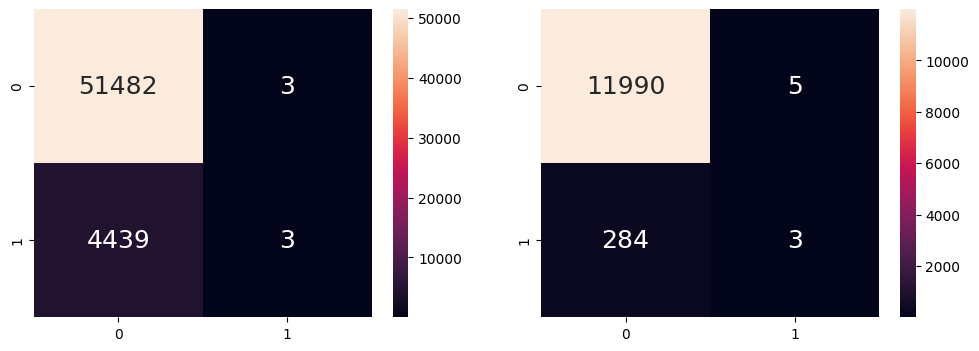

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras (with feature engineering)

### Scaling everything

In [5]:
from sklearn.preprocessing import StandardScaler

# Create new dataframe
df2 = pd.DataFrame(df)

# Select only numerical features to standardize
numerical_features = df2.columns.difference(["status_label", "company_name", "year"])

# Assuming you have a dataframe 'df' with all features
scaler1 = StandardScaler()
df2[numerical_features] = scaler1.fit_transform(df2[numerical_features])

df2.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04
mean,2007.506317,3.178758e-17,4.334670e-18,5.924049e-17,5.635071e-17,-7.224450e-18,-7.224450e-18,1.878357e-17,1.950602e-17,1.300401e-17,-8.669340e-18,7.224450e-18,-2.889780e-18,-1.300401e-17,2.022846e-17,-1.444890e-18,1.300401e-17,-4.334670e-18,2.889780e-17
std,5.742768,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,1999.000000,-2.260694e-01,-2.196058e-01,-1.858359e-01,-1.107835e+01,-1.900579e-01,-7.809049e+01,-2.147045e-01,-1.854218e-01,-3.622612e-01,-2.219492e-01,-2.228480e-01,-1.750832e+01,-5.909242e+00,-2.076224e-01,-1.615521e+01,-3.622612e-01,-2.202190e-01,-2.211664e-01
25%,2002.000000,-2.192770e-01,-1.766422e-01,-1.840087e-01,-1.876583e-01,-1.900579e-01,-1.080961e-01,-2.122439e-01,-1.835222e-01,-1.955207e-01,-2.190569e-01,-2.228409e-01,-1.728263e-01,-2.015985e-01,-2.045975e-01,-9.432228e-02,-1.955207e-01,-2.185446e-01,-1.875691e-01
50%,2007.000000,-1.985249e-01,-1.669425e-01,-1.736810e-01,-1.797828e-01,-1.834372e-01,-1.009593e-01,-1.976188e-01,-1.730664e-01,-1.822111e-01,-2.054448e-01,-2.204988e-01,-1.666007e-01,-1.870117e-01,-1.928755e-01,-8.377895e-02,-1.822111e-01,-2.100388e-01,-1.745129e-01
75%,2012.000000,-1.142500e-01,-1.074955e-01,-1.123016e-01,-1.178444e-01,-1.195921e-01,-7.051483e-02,-1.162094e-01,-1.178161e-01,-1.102609e-01,-1.312714e-01,-1.461138e-01,-1.123526e-01,-1.127027e-01,-1.317926e-01,-6.066727e-02,-1.102609e-01,-1.419966e-01,-1.066972e-01
max,2018.000000,4.296294e+01,4.177050e+01,4.339355e+01,4.043381e+01,5.879316e+01,8.272591e+01,4.904688e+01,5.810671e+01,4.262471e+01,4.095081e+01,5.105486e+01,4.748619e+01,3.611870e+01,3.956478e+01,6.304742e+01,4.262471e+01,4.174593e+01,4.602811e+01


In [7]:
# recommended training set
df2_train = df2[df2["year"] <= 2011]
y_train = df2_train["status_label"]
X_train = df2_train.drop(columns = ["company_name", "status_label", "year"])

# recommended validation set
df2_val = df2[(df2["year"] <= 2014) & (df2["year"] >= 2012)]
y_val = df2_val["status_label"]
X_val = df2_val.drop(columns = ["company_name", "status_label", "year"])

# recommended test set
df2_test = df2[(df2["year"] >= 2015)]
y_test = df2_test["status_label"]
X_test = df2_test.drop(columns = ["company_name", "status_label", "year"])

Epoch 1/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.3355 - val_accuracy: 0.9531 - val_loss: 0.1854
Epoch 2/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9207 - loss: 0.2777 - val_accuracy: 0.9532 - val_loss: 0.1828
Epoch 3/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9215 - loss: 0.2722 - val_accuracy: 0.9534 - val_loss: 0.1803
Epoch 4/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9209 - loss: 0.2737 - val_accuracy: 0.9533 - val_loss: 0.1785
Epoch 5/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9182 - loss: 0.2785 - val_accuracy: 0.9534 - val_loss: 0.1782
Epoch 6/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9202 - loss: 0.2722 - val_accuracy: 0.9534 - val_loss: 0.1825
Epoch 7/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9202 - loss: 0.2727 - val_accuracy: 0.9533 - val_loss: 0.1768
Epoch 8/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9206 - loss: 0.2712 - 


Train set evaluation:
Train Loss: 0.2668973207473755
Train Accuracy: 0.9209505319595337

Test set evaluation:
Test Loss: 0.12630198895931244
Test Accuracy: 0.9763882160186768
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


<Axes: >

<Axes: >

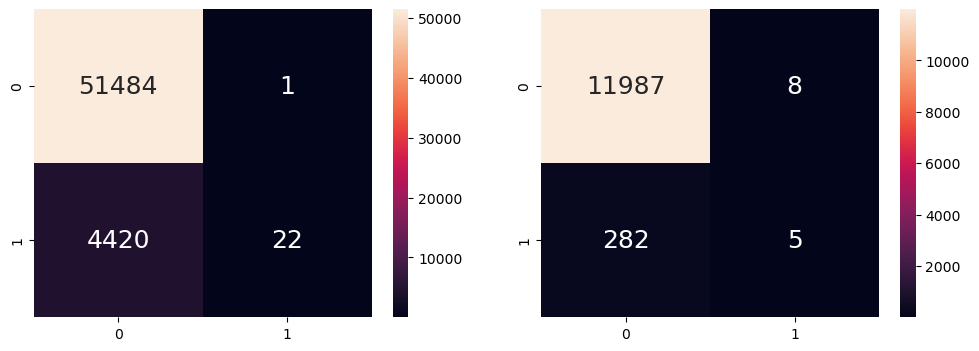

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Divide numeric values by total assets (create ratios)

In [11]:
# Create new dataframe
df3 = pd.DataFrame(df)

# Select numeric columns
cols = df3.columns.difference(["status_label", "company_name", "year"])

# Divide by X10 (total assets)
df3[cols] = df3[cols].div(df3['X10'], axis=0)

df3.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.0,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,0.513101,0.978641,0.059859,-0.377226,0.109469,-0.690219,0.146603,8.824183,1.177673,1.0,0.266361,-0.437088,0.199033,1.504377,-11.170105,1.177673,1.923343,1.554899
std,5.742768,0.260790,8.292633,0.939103,9.166994,0.138317,13.653514,0.128540,365.089771,3.240847,0.0,11.829246,9.422881,6.968307,41.537473,256.809160,3.240847,46.441906,10.906793
min,1999.000000,-0.797861,-0.400000,0.000000,-1224.000000,0.000000,-1515.000000,-0.015424,0.000002,-31.586933,1.0,-0.034901,-1241.000000,-1018.000000,0.000041,-24290.000000,-31.586933,0.000041,-0.341417
25%,2002.000000,0.303293,0.249616,0.022920,-0.038916,0.000000,-0.140486,0.050921,0.531033,0.477908,1.0,0.000000,-0.088061,0.156015,0.134449,-1.057889,0.477908,0.302422,0.497074
50%,2007.000000,0.511785,0.545541,0.037799,0.087668,0.056080,0.017422,0.118541,1.049461,0.889543,1.0,0.101972,0.047466,0.306780,0.218226,-0.015195,0.889543,0.507032,0.886975
75%,2012.000000,0.723099,1.022379,0.059484,0.149726,0.169023,0.066491,0.203685,2.122810,1.458643,1.0,0.289877,0.105050,0.495972,0.355895,0.273876,1.458643,0.710560,1.480820
max,2018.000000,1.096045,1438.000000,230.333333,35.916667,1.000000,244.833333,1.000000,69234.000000,420.000000,1.0,3287.000000,35.916667,152.250000,6324.000000,24.039409,420.000000,6324.000000,1438.000000


In [12]:
# recommended training set
df3_train = df3[df3["year"] <= 2011]
y_train = df3_train["status_label"]
X_train = df3_train.drop(columns = ["company_name", "status_label", "year"])

# recommended validation set
df3_val = df3[(df3["year"] <= 2014) & (df3["year"] >= 2012)]
y_val = df3_val["status_label"]
X_val = df3_val.drop(columns = ["company_name", "status_label", "year"])

# recommended test set
df3_test = df3[(df3["year"] >= 2015)]
y_test = df3_test["status_label"]
X_test = df3_test.drop(columns = ["company_name", "status_label", "year"])

Epoch 1/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9137 - loss: 0.4050 - val_accuracy: 0.9531 - val_loss: 0.1956
Epoch 2/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9210 - loss: 0.3407 - val_accuracy: 0.9531 - val_loss: 0.1887
Epoch 3/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9197 - loss: 0.3221 - val_accuracy: 0.9531 - val_loss: 0.1900
Epoch 4/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9170 - loss: 0.3048 - val_accuracy: 0.9530 - val_loss: 0.1882
Epoch 5/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9195 - loss: 0.2859 - val_accuracy: 0.9530 - val_loss: 0.1881
Epoch 6/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9214 - loss: 0.2768 - val_accuracy: 0.9529 - val_loss: 0.1839
Epoch 7/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9199 - loss: 0.2719 - val_accuracy: 0.9530 - val_loss: 0.1824
Epoch 8/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9219 - loss: 0.2700 - 


Train set evaluation:
Train Loss: 0.26256880164146423
Train Accuracy: 0.9205929040908813

Test set evaluation:
Test Loss: 0.13390782475471497
Test Accuracy: 0.9766324758529663
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


<Axes: >

<Axes: >

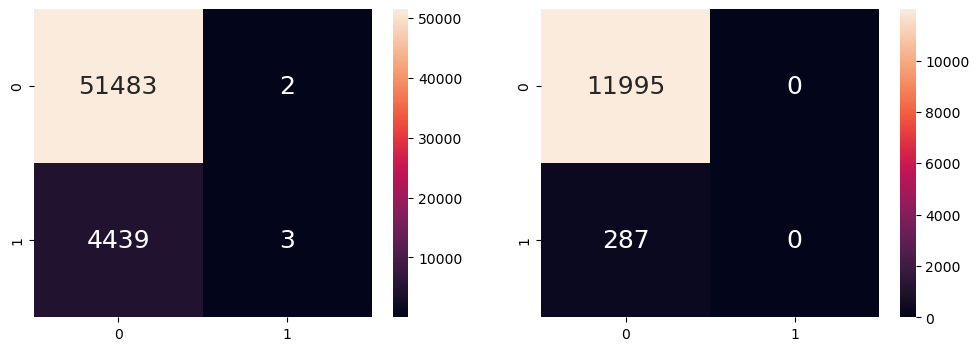

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Scale ratios

In [15]:
# Create new dataframe
df4 = pd.DataFrame(df3)

# Drop X10 column since it is constant
df4 = df4.drop('X10', axis=1)

# Select only numerical features to standardize
numerical_features = df4.columns.difference(["status_label", "company_name", "year"])

# Assuming you have a dataframe 'df' with all features
scaler2 = StandardScaler()
df4[numerical_features] = scaler2.fit_transform(df2[numerical_features])

df4.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04
mean,2007.506317,8.669340e-18,4.334670e-18,-2.889780e-18,-2.889780e-17,-1.444890e-17,1.011423e-17,1.300401e-17,-2.889780e-18,2.600802e-17,7.224450e-18,3.756714e-17,-2.456313e-17,7.224450e-18,-1.444890e-18,2.600802e-17,1.011423e-17,5.779560e-18
std,5.742768,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,1999.000000,-2.260694e-01,-2.196058e-01,-1.858359e-01,-1.107835e+01,-1.900579e-01,-7.809049e+01,-2.147045e-01,-1.854218e-01,-3.622612e-01,-2.228480e-01,-1.750832e+01,-5.909242e+00,-2.076224e-01,-1.615521e+01,-3.622612e-01,-2.202190e-01,-2.211664e-01
25%,2002.000000,-2.192770e-01,-1.766422e-01,-1.840087e-01,-1.876583e-01,-1.900579e-01,-1.080961e-01,-2.122439e-01,-1.835222e-01,-1.955207e-01,-2.228409e-01,-1.728263e-01,-2.015985e-01,-2.045975e-01,-9.432228e-02,-1.955207e-01,-2.185446e-01,-1.875691e-01
50%,2007.000000,-1.985249e-01,-1.669425e-01,-1.736810e-01,-1.797828e-01,-1.834372e-01,-1.009593e-01,-1.976188e-01,-1.730664e-01,-1.822111e-01,-2.204988e-01,-1.666007e-01,-1.870117e-01,-1.928755e-01,-8.377895e-02,-1.822111e-01,-2.100388e-01,-1.745129e-01
75%,2012.000000,-1.142500e-01,-1.074955e-01,-1.123016e-01,-1.178444e-01,-1.195921e-01,-7.051483e-02,-1.162094e-01,-1.178161e-01,-1.102609e-01,-1.461138e-01,-1.123526e-01,-1.127027e-01,-1.317926e-01,-6.066727e-02,-1.102609e-01,-1.419966e-01,-1.066972e-01
max,2018.000000,4.296294e+01,4.177050e+01,4.339355e+01,4.043381e+01,5.879316e+01,8.272591e+01,4.904688e+01,5.810671e+01,4.262471e+01,5.105486e+01,4.748619e+01,3.611870e+01,3.956478e+01,6.304742e+01,4.262471e+01,4.174593e+01,4.602811e+01


In [40]:
# recommended training set
df4_train = df4[df4["year"] <= 2011]
y_train = df4_train["status_label"]
X_train = df4_train.drop(columns = ["company_name", "status_label", "year"])

# recommended validation set
df4_val = df4[(df4["year"] <= 2014) & (df4["year"] >= 2012)]
y_val = df4_val["status_label"]
X_val = df4_val.drop(columns = ["company_name", "status_label", "year"])

# recommended test set
df4_test = df4[(df4["year"] >= 2015)]
y_test = df4_test["status_label"]
X_test = df4_test.drop(columns = ["company_name", "status_label", "year"])

Epoch 1/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9014 - loss: 0.3551 - val_accuracy: 0.9530 - val_loss: 0.1874
Epoch 2/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9196 - loss: 0.2838 - val_accuracy: 0.9531 - val_loss: 0.1837
Epoch 3/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9225 - loss: 0.2721 - val_accuracy: 0.9532 - val_loss: 0.1843
Epoch 4/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9200 - loss: 0.2754 - val_accuracy: 0.9533 - val_loss: 0.1791
Epoch 5/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9204 - loss: 0.2743 - val_accuracy: 0.9529 - val_loss: 0.1807
Epoch 6/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9184 - loss: 0.2765 - val_accuracy: 0.9533 - val_loss: 0.1783
Epoch 7/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9213 - loss: 0.2706 - val_accuracy: 0.9518 - val_loss: 0.1804
Epoch 8/10
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9200 - loss: 0.2730 - 


Train set evaluation:
Train Loss: 0.2665678858757019
Train Accuracy: 0.9210220575332642

Test set evaluation:
Test Loss: 0.13570190966129303
Test Accuracy: 0.975166916847229
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


<Axes: >

<Axes: >

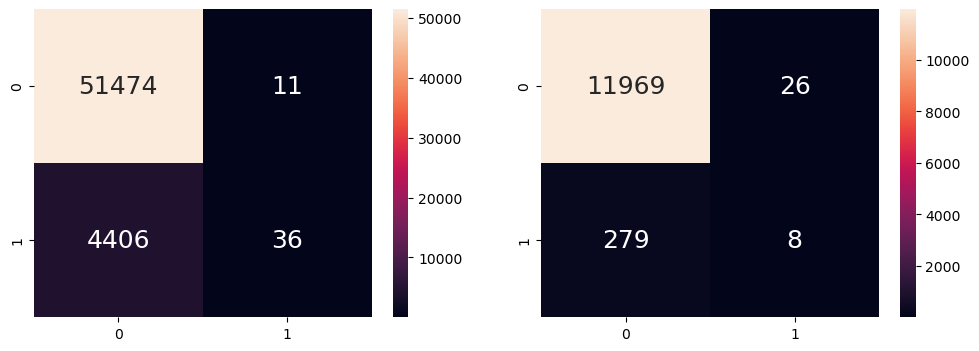

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Keras (feature engineering + balancing)

In [48]:
from sklearn.utils import resample

# recommended training set
df4_train = df4[df4["year"] <= 2011]

df4_train_majority = df4_train[df4_train.status_label == "alive"]
df4_train_minority = df4_train[df4_train.status_label == "failed"]

# Downsample majority class
df4_train_majority_downsampled = resample(
    df4_train_majority, 
    replace=False, 
    n_samples=len(df4_train_minority), 
    random_state=99
)

df5_train = pd.concat([df4_train_majority_downsampled, df4_train_minority])

y_train = df5_train["status_label"]
X_train = df5_train.drop(columns = ["company_name", "status_label", "year"])

# recommended validation set
df4_val = df4[(df4["year"] <= 2014) & (df4["year"] >= 2012)]

df4_val_majority = df4_val[df4_val.status_label == "alive"]
df4_val_minority = df4_val[df4_val.status_label == "failed"]

# Downsample majority class
df4_val_majority_downsampled = resample(
    df4_val_majority, 
    replace=False, 
    n_samples=len(df4_val_minority), 
    random_state=99
)

df5_val = pd.concat([df4_val_majority_downsampled, df4_val_minority])

y_val = df5_val["status_label"]
X_val = df5_val.drop(columns = ["company_name", "status_label", "year"])

# recommended test set
df4_test = df4[(df4["year"] >= 2015)]

df4_test_majority = df4_test[df4_test.status_label == "alive"]
df4_test_minority = df4_test[df4_test.status_label == "failed"]

# Downsample majority class
df4_test_majority_downsampled = resample(
    df4_test_majority, 
    replace=False, 
    n_samples=len(df4_test_minority), 
    random_state=99
)

df5_test = pd.concat([df4_test_majority_downsampled, df4_test_minority])

y_test = df5_test["status_label"]
X_test = df5_test.drop(columns = ["company_name", "status_label", "year"])


Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5117 - loss: 0.6999 - val_accuracy: 0.6090 - val_loss: 0.6517
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5549 - loss: 0.6791 - val_accuracy: 0.6293 - val_loss: 0.6378
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5787 - loss: 0.6702 - val_accuracy: 0.6375 - val_loss: 0.6299
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5547 - loss: 0.6721 - val_accuracy: 0.6303 - val_loss: 0.6247
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5737 - loss: 0.6672 - val_accuracy: 0.6904 - val_loss: 0.6206
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5718 - loss: 0.6678 - val_accuracy: 0.7189 - val_loss: 0.6179
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5609 - loss: 0.6713 - val_accuracy: 0.6527 - val_loss: 0.6165
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5913 - loss: 0.6703 - val_accuracy: 0.


Train set evaluation:
Train Loss: 0.6605373024940491
Train Accuracy: 0.6244934797286987

Test set evaluation:
Test Loss: 0.5781717300415039
Test Accuracy: 0.7456446290016174
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

<Axes: >

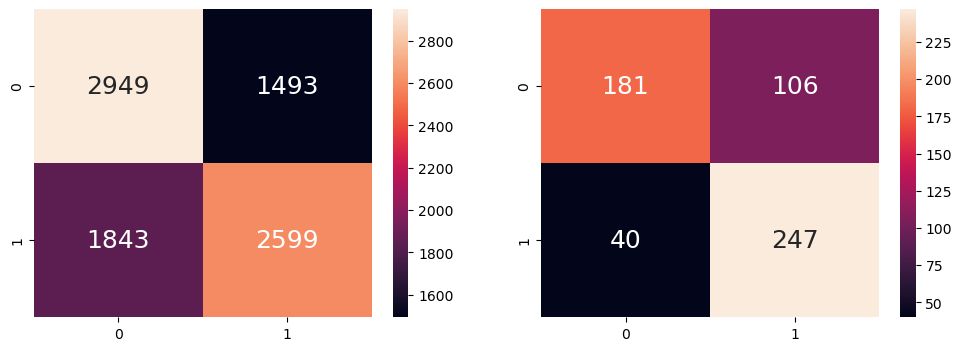

In [54]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5, seed=99))
model.add(Dense(1, activation='sigmoid'))  # Use 1 output neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

# Evaluate the model
print("\nTrain set evaluation:")
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("\nTest set evaluation:")
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict labels for train set
y_train_pred = model.predict(X_train)

# Predict labels for test set
y_test_pred = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])